In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Read csv

In [2]:
df = pd.read_csv(r"C:\Users\Datasets\Myntra Fasion Clothing.csv")
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13016\587754401.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Datasets\Myntra Fasion Clothing.csv")


,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [3]:
# Checking the shape of the data set

df.shape

(526564, 13)

In [4]:
# Checking the null values

df.isna().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

## Creating a new Data Frame

In [5]:
df1 = df.copy()

## Data Preprocessing

In [6]:
# Dropping unnecessary columns

df1.drop(['URL', 'Product_id', 'Description', 'SizeOption'], axis = 1, inplace = True)
df1.head(2)

,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,Ratings,Reviews
0,Roadster,Bottom Wear,jeans,Men,824.0,1499.0,45% OFF,3.9,999.0
1,LOCOMOTIVE,Bottom Wear,track-pants,Men,517.0,1149.0,55% OFF,4.0,999.0


In [7]:
# Renaming the columns

df1.rename(columns = {'BrandName' : 'brand_name', 'Category' : 'category', 'Individual_category' : 'individual_category', 
                      'category_by_Gender' : 'category_by_gender', 'DiscountOffer' : 'discount_offer', 
                      'DiscountPrice (in Rs)' : 'discount_price', 'OriginalPrice (in Rs)' : 'original_price', 'Ratings' : 'ratings', 
                      'Reviews' : 'reviews'}, inplace = True)

df1.head(2)

,brand_name,category,individual_category,category_by_gender,discount_price,original_price,discount_offer,ratings,reviews
0,Roadster,Bottom Wear,jeans,Men,824.0,1499.0,45% OFF,3.9,999.0
1,LOCOMOTIVE,Bottom Wear,track-pants,Men,517.0,1149.0,55% OFF,4.0,999.0


In [8]:
df1.isna().sum()

brand_name                  0
category                    0
individual_category         0
category_by_gender          0
discount_price         193158
original_price              0
discount_offer          74306
ratings                336152
reviews                336152
dtype: int64

## Operations on the Discount Offer(discount_offer) column

In [9]:
df1['discount_offer'] = df1['discount_offer'].astype(str)
df1['discount_offer']

0         45% OFF
1         55% OFF
2         55% OFF
3         31% OFF
4         35% OFF
           ...   
526559        nan
526560        nan
526561        nan
526562        nan
526563        nan
Name: discount_offer, Length: 526564, dtype: object

In [10]:
# import regex library

import re

In [11]:
# This function is used for removing '% OFF'  values

def extract_num(discount):
    num = re.findall(r'\d+', discount)
    return int(num[0]) if num else None

df1['discount_offer'] = df1['discount_offer'].apply(extract_num)

In [12]:
# Calculating the mode of 'discount_offer' column 

mode_discount = df1['discount_offer'].mode()[0]

In [13]:
# Filling the null values using the calculated mode

df1['discount_offer'].fillna(mode_discount, inplace = True)

In [14]:
df1['discount_offer']

0         45.0
1         55.0
2         55.0
3         31.0
4         35.0
          ... 
526559    50.0
526560    50.0
526561    50.0
526562    50.0
526563    50.0
Name: discount_offer, Length: 526564, dtype: float64

In [15]:
df1.isna().sum()

brand_name                  0
category                    0
individual_category         0
category_by_gender          0
discount_price         193158
original_price              0
discount_offer              0
ratings                336152
reviews                336152
dtype: int64

## Operations on the Discount Price(discount_price) column

In [16]:
# Formula for calculating the discount price

df1['discount_price'] = df1['original_price'] - (df1['discount_offer'] / 100) * df1['original_price']

## Operations on the Reviews(reviews) column

In [17]:
# Filling the null values by the mean

df1['reviews'] = df1['reviews'].fillna('mean')

In [18]:
df1['reviews']

0         999.0
1         999.0
2         999.0
3         999.0
4         999.0
          ...  
526559     mean
526560     mean
526561     mean
526562     mean
526563     mean
Name: reviews, Length: 526564, dtype: object

In [19]:
df1.isna().sum()

brand_name                  0
category                    0
individual_category         0
category_by_gender          0
discount_price              0
original_price              0
discount_offer              0
ratings                336152
reviews                     0
dtype: int64

## Operations on the Ratings(ratings) column

In [20]:
df1['ratings'].mean()

4.094892128647354

In [21]:
df1['ratings'] = df1['ratings'].fillna(4.09)

In [22]:
# All the null values are now filled

df1.isna().sum()

brand_name             0
category               0
individual_category    0
category_by_gender     0
discount_price         0
original_price         0
discount_offer         0
ratings                0
reviews                0
dtype: int64

In [23]:
df1.head()

,brand_name,category,individual_category,category_by_gender,discount_price,original_price,discount_offer,ratings,reviews
0,Roadster,Bottom Wear,jeans,Men,824.45,1499.0,45.0,3.9,999.0
1,LOCOMOTIVE,Bottom Wear,track-pants,Men,517.05,1149.0,55.0,4.0,999.0
2,Roadster,Topwear,shirts,Men,629.55,1399.0,55.0,4.3,999.0
3,Zivame,Lingerie & Sleep Wear,shapewear,Women,893.55,1295.0,31.0,4.2,999.0
4,Roadster,Western,tshirts,Women,389.35,599.0,35.0,4.2,999.0


## Data Visualization

In [24]:
# Libraries for Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Category Distribution:

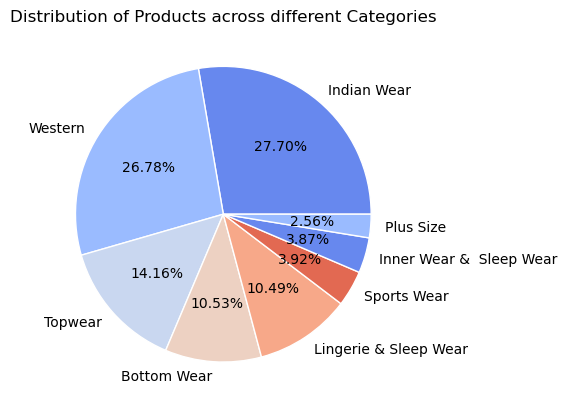

In [25]:
cat = df1['category'].value_counts()
plt.pie(cat, labels = cat.index, autopct='%1.2f%%', colors = sns.color_palette('coolwarm'), 
        textprops={'fontsize':10}, wedgeprops = {'edgecolor' : 'white', 'linewidth' : 1})
plt.title('Distribution of Products across different Categories')
plt.show()

The above pie chart shows the distribution of products across various categories. It can be observed that the number of 'western wear' is more on myntra.

## 2. Gender-Based Categories:

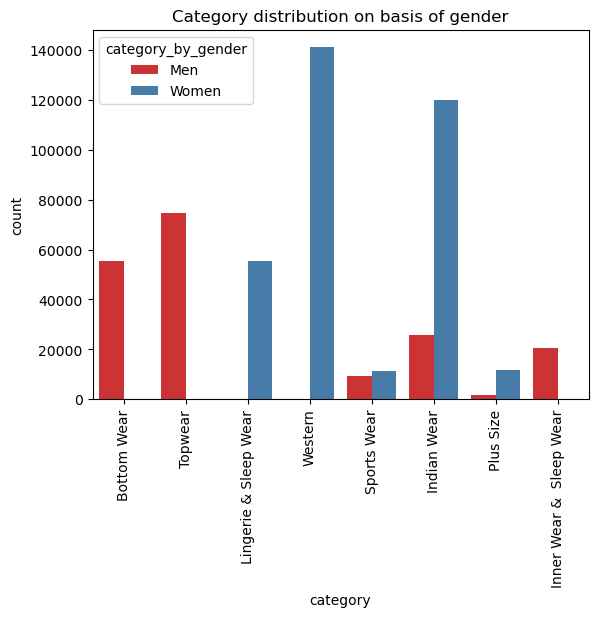

In [26]:
plt.title('Category distribution on basis of gender')
ax = sns.countplot(data = df1, x = 'category', hue = 'category_by_gender', palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

The above plot shows the distribution of categories on the basis of gender.

## 3. Top 10 Popular brands

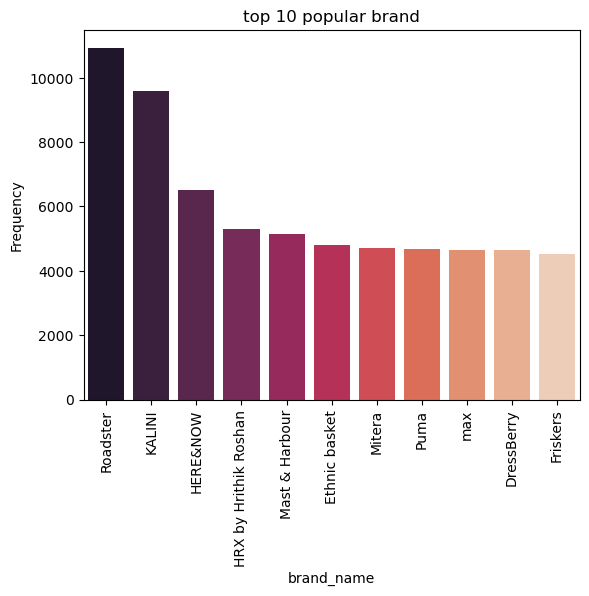

In [27]:
c = df1['brand_name'].value_counts()
c = c[1:12]
plt.title('top 10 popular brand')
plt.ylabel('Frequency')
plt.xlabel('BrandName')
ax = sns.barplot(x = c.index, y = c.values, palette = "rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

The above plot shows the Top 10 popular brands.

## 4. Total Product based on Category by Gender

<Axes: xlabel='category_by_gender'>

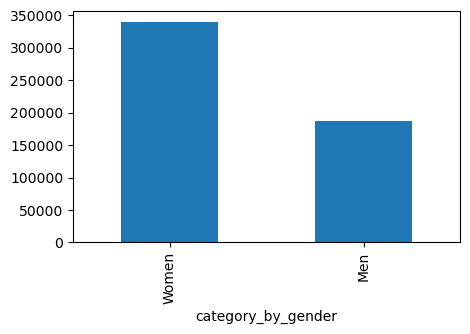

In [43]:
df1['category_by_gender'].value_counts().plot(kind = 'bar', stacked = True, figsize = (5,3))

The above plot shows the number of products based on the gender.

## 5. Top 15 Brands on price based Original Price

<Axes: ylabel='brand_name'>

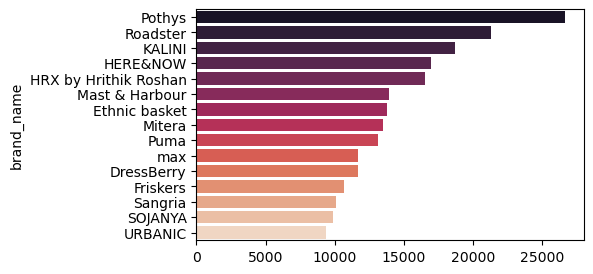

In [44]:
plt.figure(figsize = (5, 3))
sns.barplot(x = df1['original_price'].value_counts().head(15).values, y = df1['brand_name'].value_counts().head(15).index, palette = 'rocket')

The above plot shows the Top 15 brands based on the original price.

## 6. Top 15 brands based on Product Value Count

<Axes: ylabel='brand_name'>

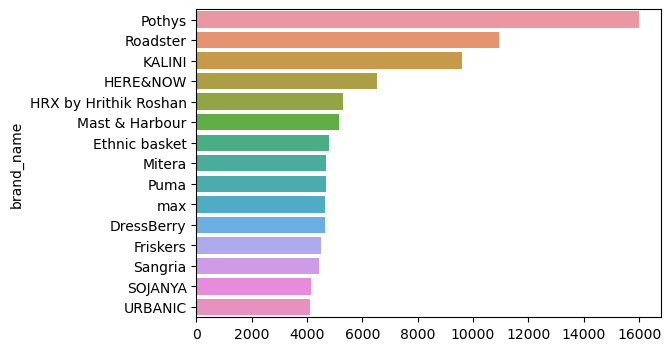

In [45]:
plt.figure(figsize = (6, 4))

sns.barplot(x = df1['brand_name'].value_counts().head(15).values, y = df1['brand_name'].value_counts().head(15).index)

The above plot shows the Top 15 brands based on the value count.

## 7. Most selling brand by Women :

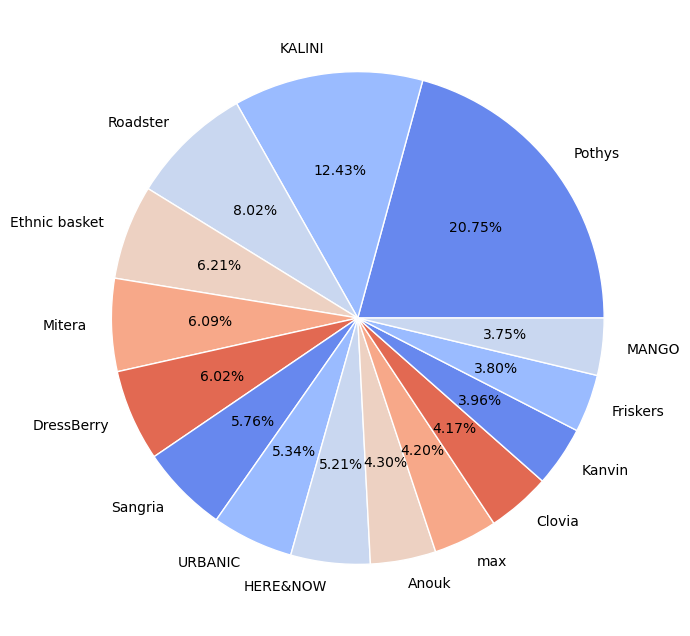

In [50]:
K = df1[df1['category_by_gender'] == 'Women']
D= K['brand_name'].value_counts().values
W = K['brand_name'].value_counts().index

plt.figure(figsize = (10, 8))

plt.pie(D[:15],labels = W[:15], autopct = '%1.2f%%', colors = sns.color_palette('coolwarm'),  
        textprops={'fontsize':10}, wedgeprops = {'edgecolor' : 'white', 'linewidth' : 1})
plt.show()

It is observed that, 'Pothys' is the most selling brand in the gender category 'Women'.

## 8. Most selling brand by Men :

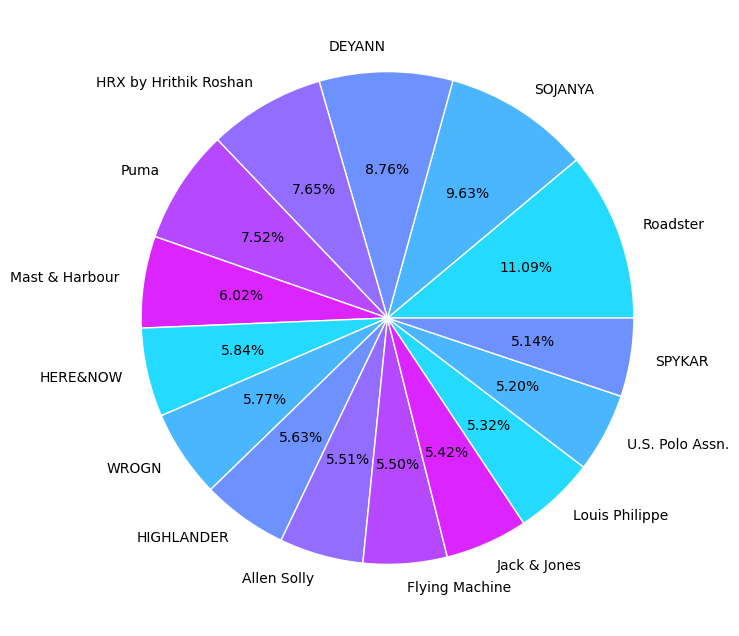

In [51]:
K = df1[df1['category_by_gender'] == 'Men']
D= K['brand_name'].value_counts().values
W = K['brand_name'].value_counts().index

plt.figure(figsize = (10, 8))

plt.pie(D[:15],labels = W[:15], autopct = '%1.2f%%', colors = sns.color_palette('cool'),  
        textprops={'fontsize':10}, wedgeprops = {'edgecolor' : 'white', 'linewidth' : 1})
plt.show()

It is observed that, 'Roadster' is the most selling brand in the gender category 'Men'.

## 9. Top Categorywise sales

<Axes: ylabel='category'>

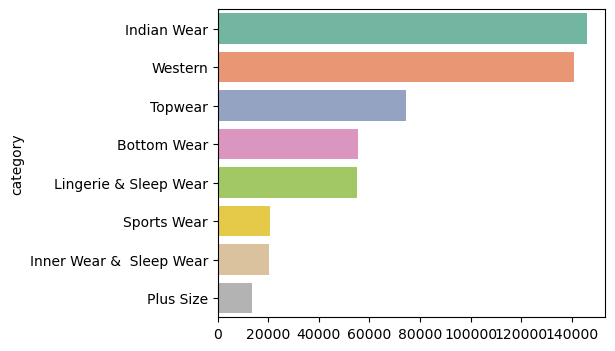

In [52]:
plt.figure(figsize = (5, 4))
sns.barplot(x = df1['category'].value_counts().head(8).values, y = df1['category'].value_counts().head(8).index, palette = 'Set2')

The above plot shows the category-wise sales. It can be observed that the sales of 'Indian Wear' category is high.

## 10. Top 10 individual categories : 

<Axes: ylabel='individual_category'>

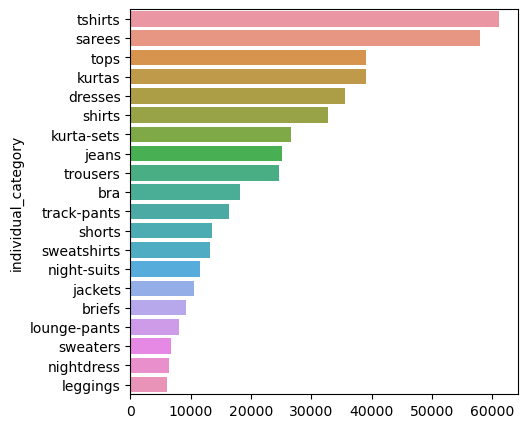

In [53]:
plt.figure(figsize = (5, 5))
sns.barplot(x = df1['individual_category'].value_counts().head(20).values, y = df1['individual_category'].value_counts().head(20).index)

The above plot shows the Top 10 Individual Categories.

## 11. Price range analysis for each category and sub-category

In [35]:
# Group the dataset by 'Category' and 'Individual_category' and calculate the maximum and minimum values of 'DiscountPrice (in Rs)'
price_range = df1.groupby(['category', 'individual_category'])['original_price'].agg(['min', 'max'])

# Reset the index of the resulting dataframe
price_range = price_range.reset_index()

# Print the resulting dataframe
print(price_range)

        category individual_category     min      max
0    Bottom Wear               jeans   600.0  14999.0
1    Bottom Wear              shorts   399.0   9999.0
2    Bottom Wear         track-pants   375.0  16999.0
3    Bottom Wear            trousers   550.0  19999.0
4    Indian Wear             blazers  2799.0  10999.0
..           ...                 ...     ...      ...
205      Western         track-pants   330.0   9999.0
206      Western          tracksuits  1490.0  12000.0
207      Western            trousers   499.0  16990.0
208      Western             tshirts   199.0   9500.0
209      Western           waistcoat  1599.0   5590.0

[210 rows x 4 columns]


## 12. Brands having the highest number of products in each category

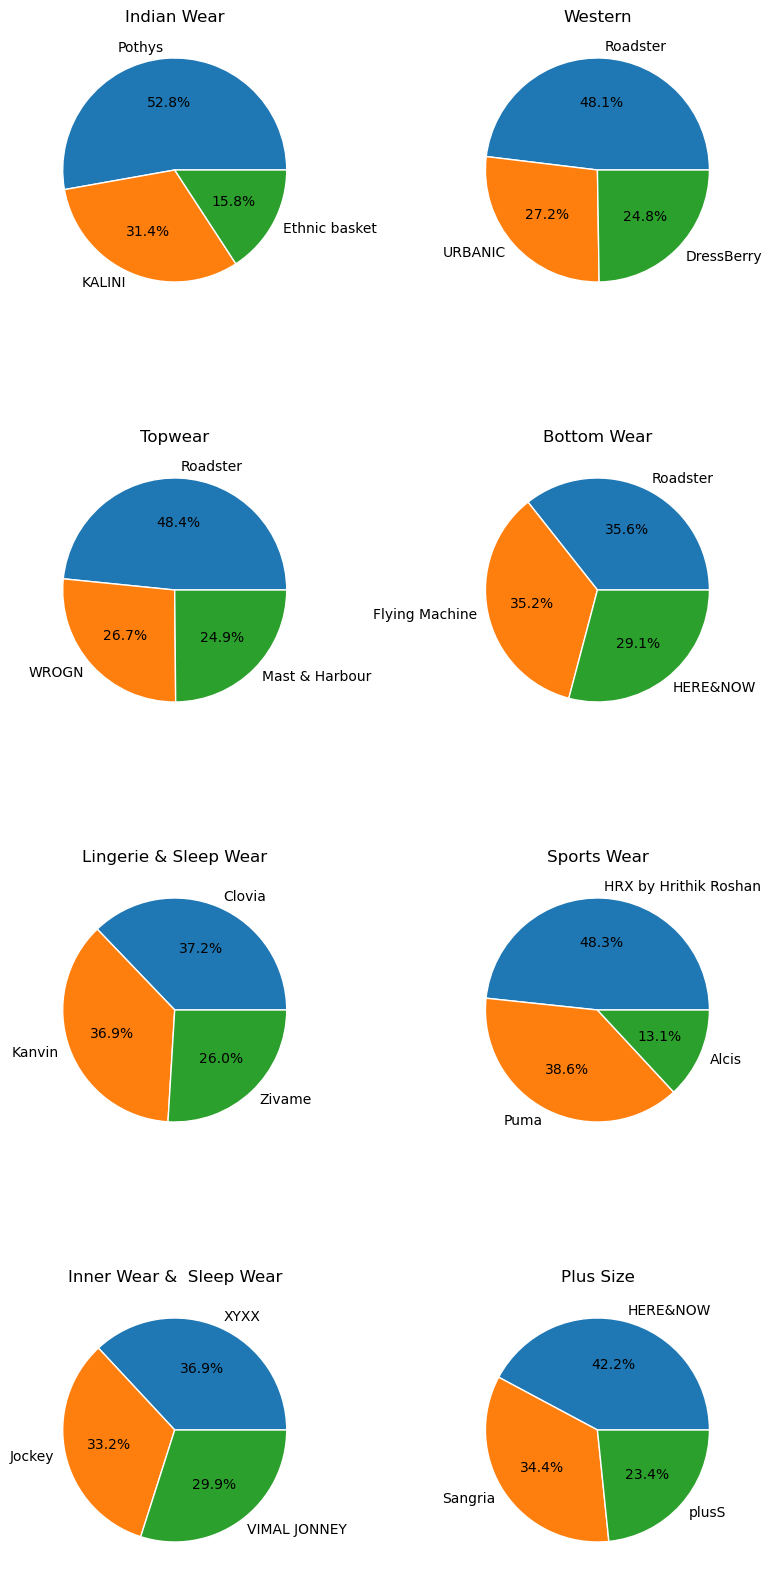

In [55]:
top_cats = df1['category'].value_counts()

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (10, 20))

# iterate through top categories and plot pie charts
for i, category in enumerate(top_cats.index):
    top_brands = df1[df1['category'] == category]['brand_name'].value_counts().head(3)
    ax = axes[i // 2, i % 2]
    ax.set_title(category)
    ax.pie(top_brands, labels = top_brands.index, autopct = '%1.1f%%',
           textprops={'fontsize':10}, wedgeprops = {'edgecolor' : 'white', 'linewidth' : 1})
    
plt.subplots_adjust(hspace = 0.5)
plt.show()

## 13. Most selling category in Women : 

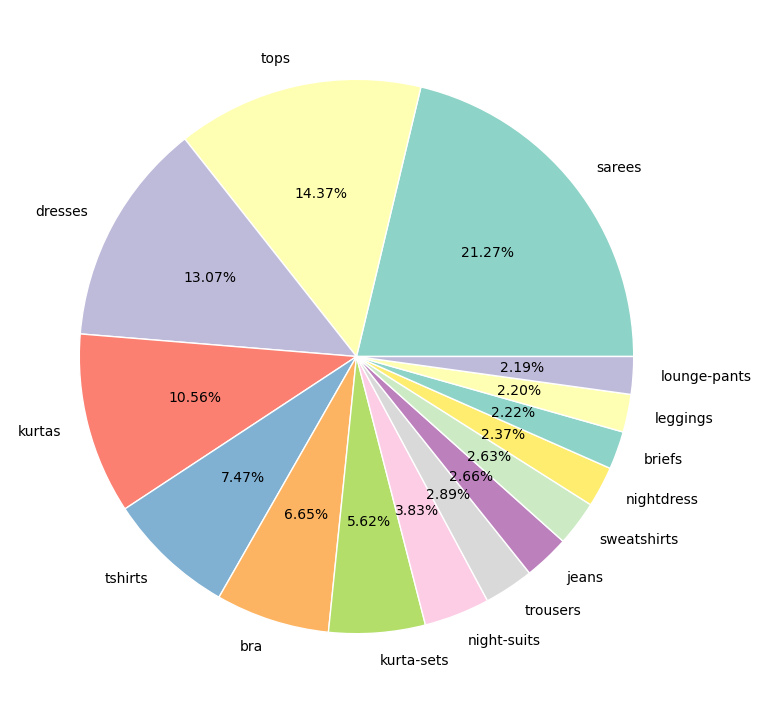

In [57]:
K = df1[df1['category_by_gender'] == 'Women']
S = K['individual_category'].value_counts().values
V = K['individual_category'].value_counts().index

plt.figure(figsize = (10, 9))
plt.pie(S[:15],labels = V[:15], autopct='%1.2f%%', colors = sns.color_palette('Set3'),
       textprops={'fontsize':10}, wedgeprops = {'edgecolor' : 'white', 'linewidth' : 1})
plt.show()

It is observed that, 'Sarees'are the most selling category in the gender category 'Women'.

## 14. Most selling category in Men : 

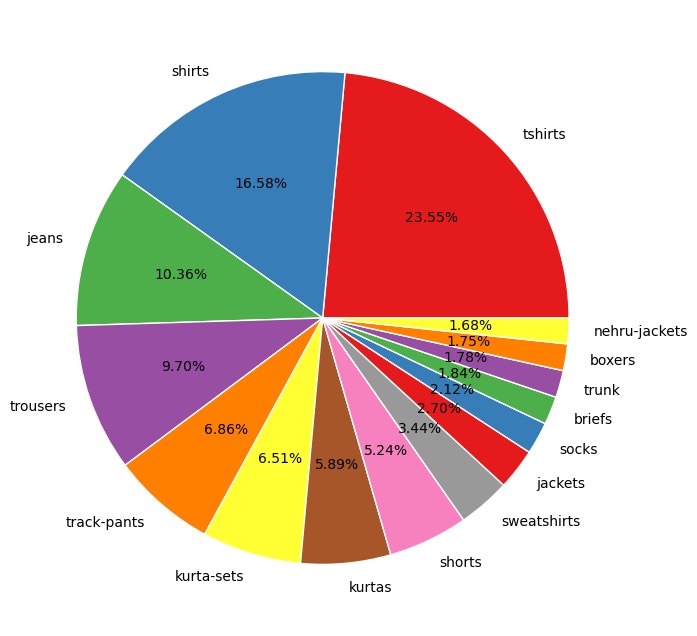

In [58]:
K = df1[df1['category_by_gender'] == 'Men']
S = K['individual_category'].value_counts().values
V = K['individual_category'].value_counts().index

plt.figure(figsize = (10, 8))
plt.pie(S[:15],labels = V[:15], autopct='%1.2f%%', colors = sns.color_palette('Set1'),
       textprops={'fontsize':10}, wedgeprops = {'edgecolor' : 'white', 'linewidth' : 1})
plt.show()

It is observed that, 'Tshirts' are the most selling category in the gender category 'Men'.

## 15. Category having the highest average original price

In [39]:
avg_price_by_category = df1.groupby(['category'])['original_price'].mean().sort_values(ascending = False)
highest_avg_price_category = avg_price_by_category.index[0]
print("Category with highest average original price:", highest_avg_price_category)
print("average original price: ", avg_price_by_category)

Category with highest average original price: Indian Wear
average original price:  category
Indian Wear                 3593.233493
Bottom Wear                 2407.295081
Plus Size                   2200.859736
Sports Wear                 2049.727735
Western                     2048.926826
Topwear                     2041.358238
Lingerie & Sleep Wear       1425.511043
Inner Wear &  Sleep Wear    1072.951350
Name: original_price, dtype: float64


Here, it can be observed that, 'Indian Wear' has the highest average original price.

## 16. Individual Category having the highest number of products

In [40]:
highest_counts = df1['individual_category'].value_counts()
Top_individual_category = highest_counts.index[0]

print("individual category has the highest number of products :", Top_individual_category)
print(highest_counts)

individual category has the highest number of products : tshirts
individual_category
tshirts           61198
sarees            57915
tops              39126
kurtas            38984
dresses           35590
                  ...  
jewellery-set         2
hair-accessory        1
lungi                 1
bracelet              1
flip-flops            1
Name: count, Length: 92, dtype: int64


It can be observed that the category 'T-Shirts' has the highest number of products.

## 17. Gender Category having the highest average original price

In [41]:
avg_price_by_gencategory = df1.groupby(['category_by_gender'])['original_price'].mean().sort_values(ascending = False)
highest_avg_price_gencategory = avg_price_by_gencategory.index[0]
print("Category with highest average original price:", highest_avg_price_gencategory)
print("average original price: ", avg_price_by_gencategory)

Category with highest average original price: Women
average original price:  category_by_gender
Women    2467.091351
Men      2318.089252
Name: original_price, dtype: float64


It is observed that, 'Women' gender category has the highest original price.